In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Read and display the dataset
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#We will drop the columns which might not be useful for prediction
df1 = df1.drop(['area_type','society','availability','balcony'], axis = 'columns')

In [4]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
#Since the count of rows with null values is very less, we will drop them
df1 = df1.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
#Take just the number of bhk and put that in a different column
df1['bhk'] = df1['size'].apply(lambda x : int(x.split(' ')[0]))

In [8]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [9]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [10]:
df1[df1['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [11]:
#43 bedroom with 2400 sqft. looks unusual so it's better to explore the column
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [14]:
#We take average of all these ranges using a function
def convert_range_to_number(x):
    value = x.split('-')
    if len(value) == 2:
        return (float(value[0])+float(value[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_range_to_number)

In [16]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk


In [17]:
df1['price_per_sqft'] = (df1['price']*100000)/df1['total_sqft']

In [18]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
len(df1['location'].unique())

1304

In [20]:
df1['location'] = df1['location'].apply(lambda x : x.strip())
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [21]:
len(location_stats[location_stats<=10])
location_less_than_10 = location_stats[location_stats<=10]

In [22]:
df1['location'] = df1['location'].apply(lambda x : 'other' if x in location_less_than_10 else x)

In [23]:
df1.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [24]:
len(df1['location'].unique())

242

In [25]:
#Removing outliers
#If a single bedroom is not atleast 300 sqft then we are removing it
df1[df1['total_sqft']/df1['bhk'] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [26]:
df1 = df1[~(df1['total_sqft']/df1['bhk'] < 300)]

In [27]:
df1['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
#Wherever the value of price_per_sqft is unusual, it is removed
def remove_price_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(df['price_per_sqft'])
        sd = np.std(df['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (mean-sd)) & (subdf['price_per_sqft'] <= (mean+sd))]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out

In [29]:
df2 = remove_price_sqft_outliers(df1)
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000
1,1st Block Jayanagar,3 BHK,1760.0,3.0,115.0,3,6534.090909
2,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
3,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
4,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


In [41]:
#If the price of three bedroom apartment is less than the two-bedroom apartment then it is considered an outlier
def draw_scatter_plot(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2['total_sqft'],bhk2['price_per_sqft'],color = 'blue',label = '2BHK',s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price_per_sqft'],color = 'green',label = '3BHK',s=50, marker = '+')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

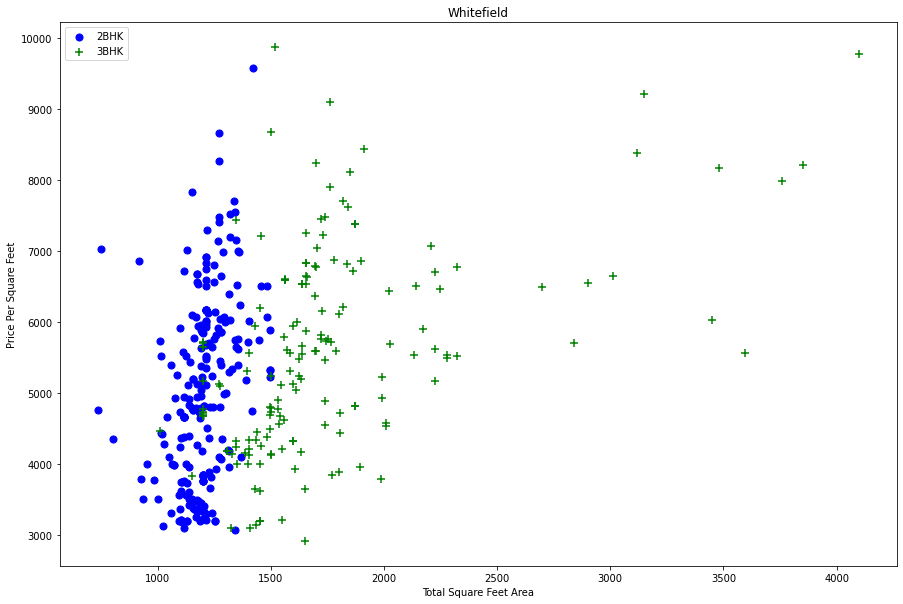

In [42]:
draw_scatter_plot(df2,'Whitefield')

In [69]:
#We find some data points where the price of the 2bhk > 3bhk even when total_sqft is less, we need to remove them
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {'mean' : np.mean(bhk_df['price_per_sqft']),
                             'sd': np.std(bhk_df['price_per_sqft']),
                             'count': bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [70]:
df3 = remove_bhk_outliers(df2)
df3.shape

(8089, 7)

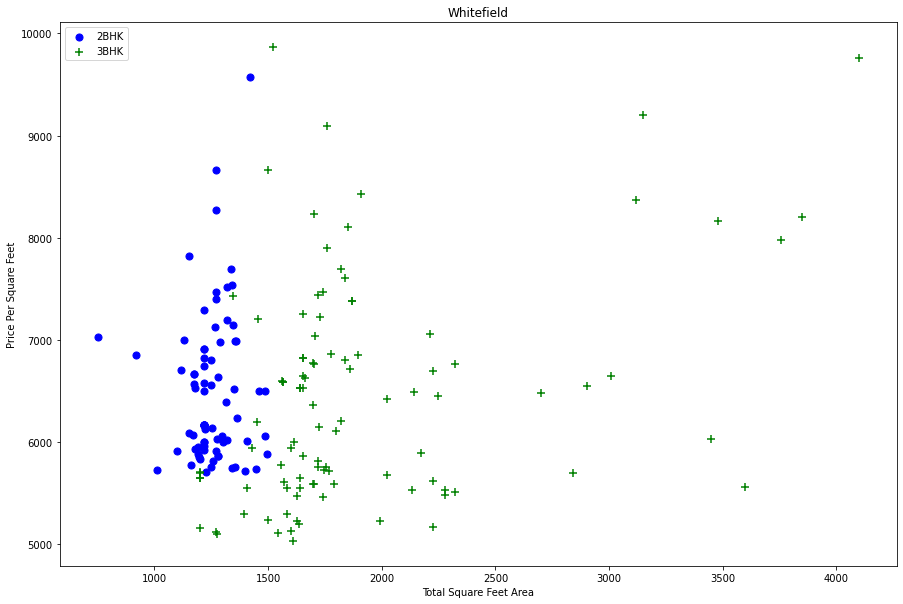

In [72]:
draw_scatter_plot(df3,'Whitefield')

Text(0, 0.5, 'Count')

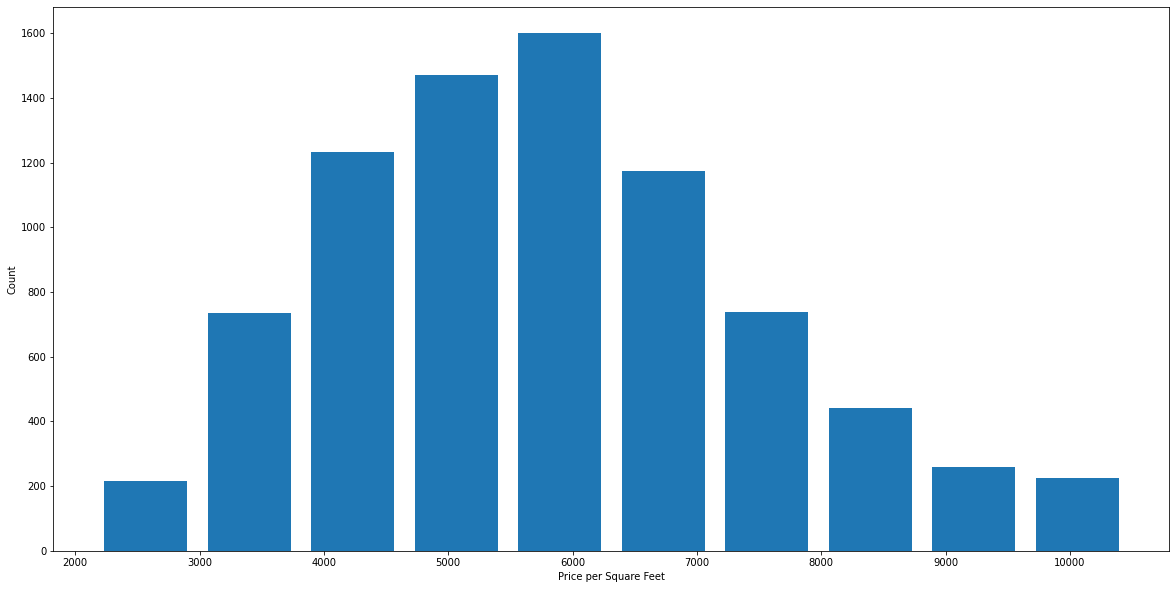

In [74]:
plt.figure(figsize=(20,10))
plt.hist(df3['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

In [75]:
df3.bath.unique()

array([ 3.,  5.,  4.,  2.,  1.,  8.,  7.,  6.,  9., 10., 12., 16., 13.])

In [76]:
df3[df3['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6121,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9699,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9775,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
10444,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10748,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

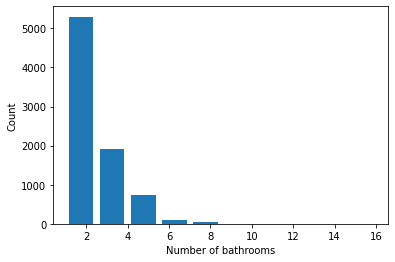

In [77]:
plt.hist(df3['bath'],rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [78]:
df3[df3['bath']>df3['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1861,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6069,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7829,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9629,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [79]:
df3 = df3[df3['bath']<df3['bhk']+2]
df3.shape

(8009, 7)

In [80]:
df3 = df3.drop(['size','price_per_sqft'],axis='columns')
df3.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1000.0,3.0,60.0,2
1,1st Block Jayanagar,1760.0,3.0,115.0,3
3,1st Phase JP Nagar,1875.0,3.0,167.0,3
4,1st Phase JP Nagar,1500.0,5.0,85.0,5
5,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [81]:
dummies = pd.get_dummies(df3['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df4 = pd.concat([df3,dummies.drop('other',axis = 'columns')],axis = 'columns')
df4.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1000.0,3.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1760.0,3.0,115.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,1500.0,5.0,85.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2065.0,4.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df4 = df4.drop('location', axis = 'columns')
df4.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1000.0,3.0,60.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1760.0,3.0,115.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df4.shape

(8009, 244)

In [105]:
#Declaring the independent and dependent variables
x = pd.DataFrame(df4.drop('price',axis = 'columns'))
y = pd.DataFrame(df4.price)

In [106]:
#Splitting the dataset into testing and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

In [107]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.8285068559214384

In [109]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv = cv)

array([0.81821528, 0.83390187, 0.8495831 , 0.82222309, 0.87090886])

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_grid_search_Cv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [111]:
find_best_model_using_grid_search_Cv(x,y)

,model,best_score,best_params
0,linear_regression,0.838966,{'normalize': False}
1,lasso,0.806384,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.783383,"{'criterion': 'mse', 'splitter': 'random'}"


In [112]:
#Testing the model

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1

    return regressor.predict([z])[0]

In [113]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

array([83.92951616])

In [114]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

array([84.87931139])

In [115]:
predict_price('Indira Nagar',1000, 2, 2)

array([93.732216])

In [116]:
#Export the model to a pickle file to use in Python Flask Server
import pickle
with open('realestate_prices_prediction_model.pickle','wb') as f:
    pickle.dump(regressor,f)

In [118]:
#Export the column information to a json file
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))